# *** *Diabetes Prediction* ***
 # Step1: Importing the libraries.

In [164]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Loading a Data

In [166]:
df = pd.read_excel("diabetes_data.xlsx")

In [167]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [168]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [169]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# Step3: Performing a mapping or transformation on a specific column


In [171]:
df.shape


(768, 9)

In [172]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

 # Step 4: Creating a new binary column named “Outcome.”by  using mapping 
   

In [174]:

df['Outcome'] = df['Outcome'].map({
    1: 'Diabetic',
    0: 'Non-Diabetic'
})


In [175]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,Non-Diabetic
764,2,122,70,27,0,36.8,0.340,27,Non-Diabetic
765,5,121,72,23,112,26.2,0.245,30,Non-Diabetic
766,1,126,60,0,0,30.1,0.349,47,Diabetic


In [176]:
# separating the data and lables
X =df.drop(columns= 'Outcome',axis = 1)
Y = df['Outcome']

In [177]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [178]:
Y

0          Diabetic
1      Non-Diabetic
2          Diabetic
3      Non-Diabetic
4          Diabetic
           ...     
763    Non-Diabetic
764    Non-Diabetic
765    Non-Diabetic
766        Diabetic
767    Non-Diabetic
Name: Outcome, Length: 768, dtype: object

In [179]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


# Step 5: Creating a histogram using 'plt.hist' to visualize thedistribution of the “Outcome” column


In [181]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


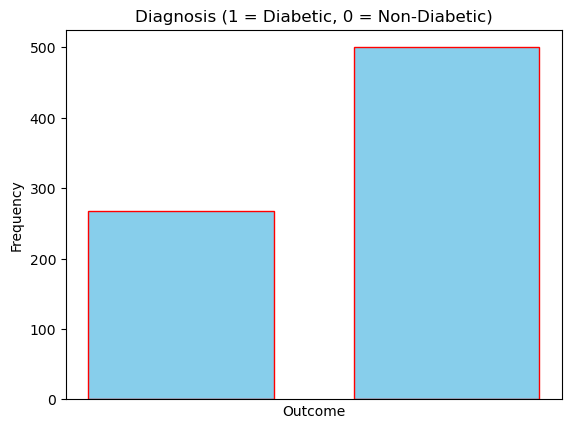

In [182]:
# Create histogram for 'Outcome' column
import matplotlib.pyplot as plt

plt.hist(df['Outcome'], bins=2, edgecolor='r', color='skyblue', rwidth=0.7)  # Adjust rwidth for spacing
plt.title('Diagnosis (1 = Diabetic, 0 = Non-Diabetic)')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()



 #  step 6:Creating a set of histograms for various features

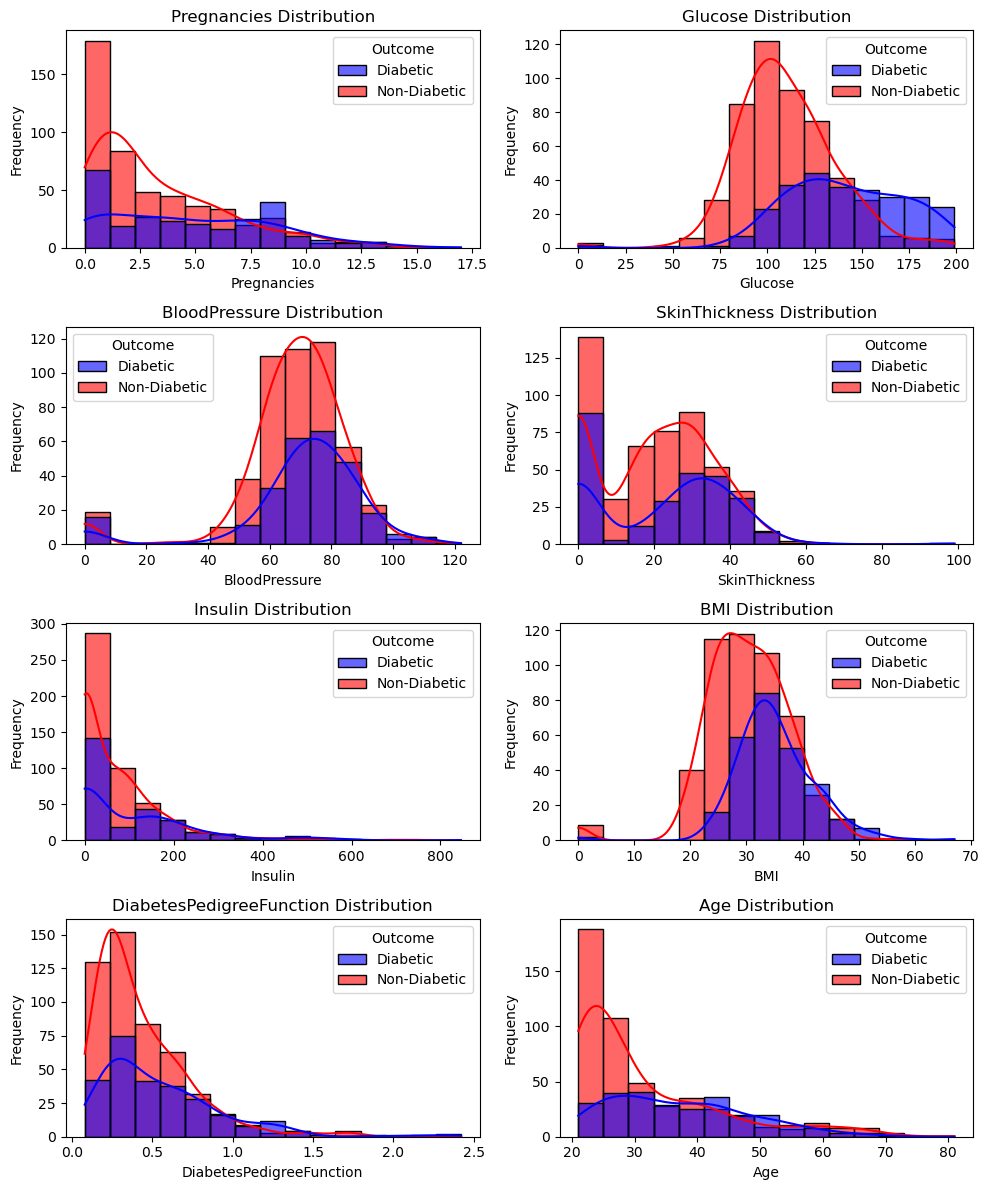

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define features to visualize
X = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
     'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create subplots
plt.figure(figsize=(10, 12))  # Adjust figure size

for i, feature in enumerate(X):
    plt.subplot(4, 2, i + 1)  # Create subplot grid of 4x2

    # Plot histogram using seaborn for better visualization
    sns.histplot(data=df, x=feature, hue='Outcome', kde=True, bins=15, palette=['blue', 'red'], alpha=0.6)

    # Add title and labels
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the histograms
plt.show()


# Step 7: Data Standardising


In [208]:
from sklearn.preprocessing import StandardScaler

# Define the scaler
scaler = StandardScaler()

# Pass actual numeric data, not column names
standardized_data = scaler.fit_transform(df[X])  

# Convert to DataFrame (optional, for better readability)
standardized_df = pd.DataFrame(standardized_data, columns=X)

# Display the first few rows
print(standardized_df.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  


In [216]:
X = standardized_data
Y = df['Outcome']
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0          Diabetic
1      Non-Diabetic
2          Diabetic
3      Non-Diabetic
4          Diabetic
           ...     
763    Non-Diabetic
764    Non-Diabetic
765    Non-Diabetic
766        Diabetic
767    Non-Diabetic
Name: Outcome, Length: 768, dtype: object


In [220]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
Diabetic,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164
Non-Diabetic,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000


# Step 7: Splitting the data into training and testing

In [232]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [234]:
train_df, test_df = train_test_split(df)
# Print the sizes of the training and testing sets
print(f'Training set size: {len(train_df)} rows')
print(f'Testing set size: {len(test_df)} rows')

Training set size: 576 rows
Testing set size: 192 rows


# Step 8: Training the model by using Support Vector Machine

In [237]:
model = svm.SVC(kernel = 'linear')

In [239]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [241]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [243]:
print(f'Training Accuracy: {training_data_accuracy:.2f}')

Training Accuracy: 0.78


In [245]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test )

In [247]:
print(f'Testing Accuracy: {testing_data_accuracy:.2f}')

Testing Accuracy: 0.75


# Step 9: Classification model

In [250]:
def classification_model(model, X_train, X_test, Y_train, Y_test, n_folds=5):
 # Train the model
 model.fit(X_train, Y_train)
 
 # Predict and evaluate
 predictions = model.predict(X_test)
 accuracy = accuracy_score(Y_test, predictions)
 print(f'Testing Accuracy: {accuracy:.2f}')
 # Cross-validation
 cv_scores = cross_val_score(model, X_train, Y_train, cv=n_folds)
 print(f'Mean Cross-Validation Score: {cv_scores.mean():.2f}')
classification_model(model, X_train, X_test, Y_train, Y_test, n_folds=5)

Testing Accuracy: 0.75
Mean Cross-Validation Score: 0.78


# Step 10: Logistic Regression model

In [253]:
logistic_model = LogisticRegression()
classification_model(logistic_model, X_train, X_test, Y_train, Y_test)
# Create a Logistic Regression model
model = LogisticRegression() # Increase max_iter for potential convergence issu
# Train the model
model.fit(X_train, Y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")
# Print the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Testing Accuracy: 0.74
Mean Cross-Validation Score: 0.77
Accuracy: 0.7359307359307359
Confusion Matrix:
[[ 50  30]
 [ 31 120]]
